# Part I - (Ford GoBike System Data)
## by (Kariem AbuAisheh)

## Introduction

The dataset contains information about bike-sharing trips from the Ford GoBike system in February 2019. It consists of 183,412 records with 16 features describing each trip, including trip duration, start and end stations, user demographics, and membership type.

## Preliminary Wrangling

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("201902-fordgobike-tripdata.csv")
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### What is the structure of your dataset?

The dataset contains 16 columns:

- Trip Details: 
    - duration_sec.
    - start_time.
    - end_time.
    
- Station Details: 
    - start_station_id.
    - start_station_name.
    - start_station_latitude.
    - start_station_longitude.
    - end_station_id.
    - end_station_name.
    - end_station_latitude.
    - end_station_longitude.

- User Details: 
    - bike_id.
    - user_type.
    - member_birth_year. 
    - member_gender.
    - bike_share_for_all_trip.

- Some columns have missing values, particularly:

    - member_birth_year and member_gender.
    - start_station_id.
    - start_station_name.
    - end_station_id.
    - end_station_name.

### What is/are the main feature(s) of interest in your dataset?

The primary features of interest in this dataset are:

- Trip Duration (duration_sec): Understanding trip length distribution.
- User Type (user_type): Differentiating between casual users (Customers) and members (Subscribers).
- Station Usage (start_station_name, end_station_name): Identifying popular stations and travel patterns.
- User Demographics (member_gender, member_birth_year): Analyzing trends across different user groups.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- Trip Time (start_time, end_time): Helps analyze trip frequency by time of day or day of the week.
- Station Location (start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude): Helps visualize geographic usage patterns.
- Bike Share Participation (bike_share_for_all_trip): Understanding how many users opt for the bike-sharing program.

## Univariate Exploration


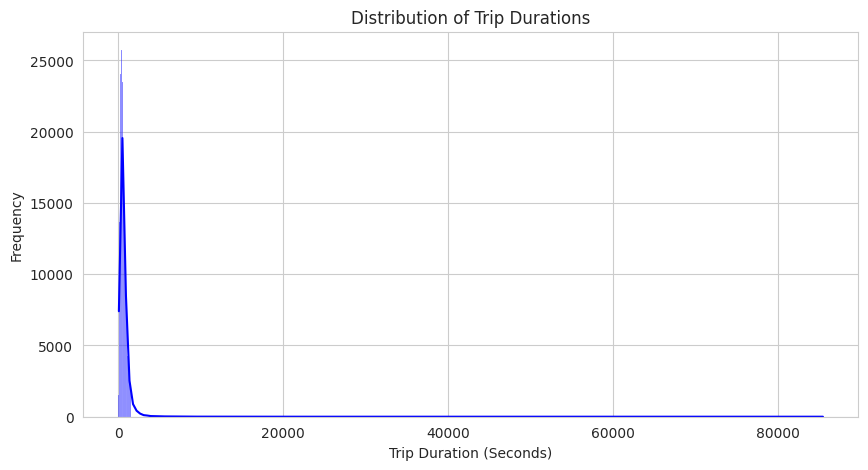

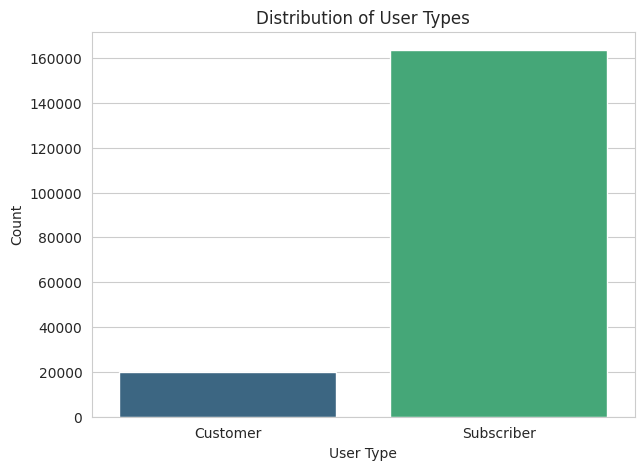

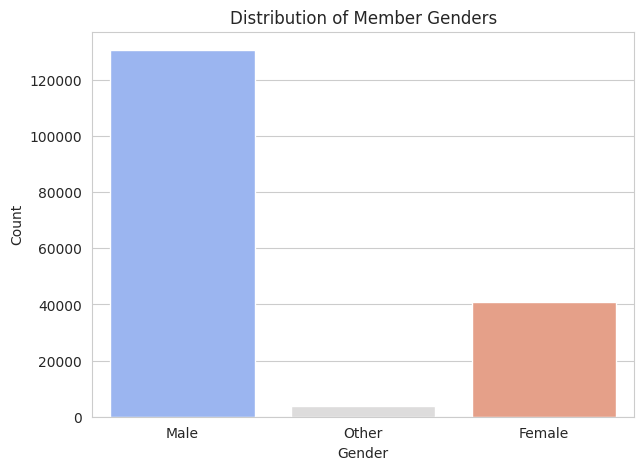

In [9]:
sns.set_style("whitegrid")

# Trip Duration Distribution
plt.figure(figsize=(10, 5))
bins = range(0, df["duration_sec"].quantile(0.95).astype(int), 100)  
sns.histplot(df["duration_sec"], bins=bins, kde=True, color='blue')
plt.xlabel("Trip Duration (Seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of Trip Durations")
plt.show()

# User Type Distribution (Fixed)
plt.figure(figsize=(7, 5))
sns.countplot(x="user_type", data=df, hue="user_type", palette="viridis", legend=False)
plt.xlabel("User Type")
plt.ylabel("Count")
plt.title("Distribution of User Types")
plt.show()

# Gender Distribution (Fixed)
plt.figure(figsize=(7, 5))
sns.countplot(x="member_gender", data=df, hue="member_gender", palette="coolwarm", legend=False)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Member Genders")
plt.show()


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Trip Duration Distribution
- The majority of trips last less than 1,000 seconds (around 16 minutes), with a peak at shorter durations.
- There were extreme outliers with trip durations much longer than typical rides, suggesting potential bike misuse, errors in trip logging, or long-term rentals.
- To handle this, I limited the histogram to the 95th percentile of trip durations to focus on common usage patterns.

User Type Distribution
- The dataset is dominated by "Subscriber" users, significantly outnumbering "Customer" (casual) riders.
- This suggests that most users use the service regularly rather than for one-time or infrequent trips.

Gender Distribution
- The dataset is heavily skewed towards male users, with fewer female riders and a small "Other" category.
- There were some missing values in the gender column, but no transformations were applied at this stage.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Trip Duration Outliers
- There were unusually long trips, possibly indicating errors or rare cases of long-term rentals.
- To prevent misleading visualizations, I restricted the histogram to the 95th percentile.

Missing Values in Gender
- Some users did not provide gender information.
- No modifications were made yet, but handling missing values could be considered for further analysis.

## Bivariate Exploration

**Planned Analysis**
- Trip Duration vs. Age (duration_sec vs. member_birth_year) → Scatter Plot
To check if older riders take longer trips.
- Trip Duration by User Type (duration_sec vs. user_type) → Box Plot
To see if "Customers" (casual riders) take longer trips than "Subscribers".
- User Type vs. Gender (user_type vs. member_gender) → Clustered Bar Chart
To explore if gender affects membership type.
- Trip Start Times (Heatmap of Hour vs. Weekday) → Heatmap
To visualize peak bike usage times.

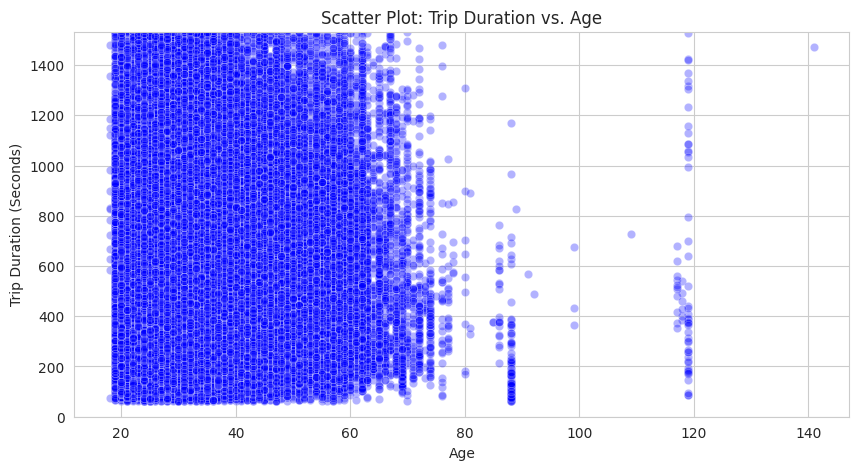

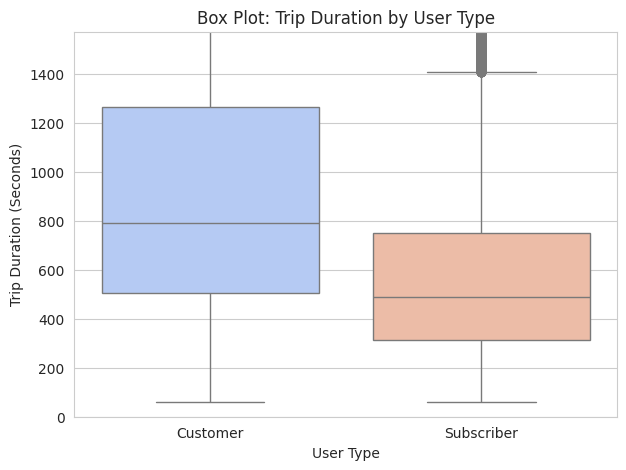

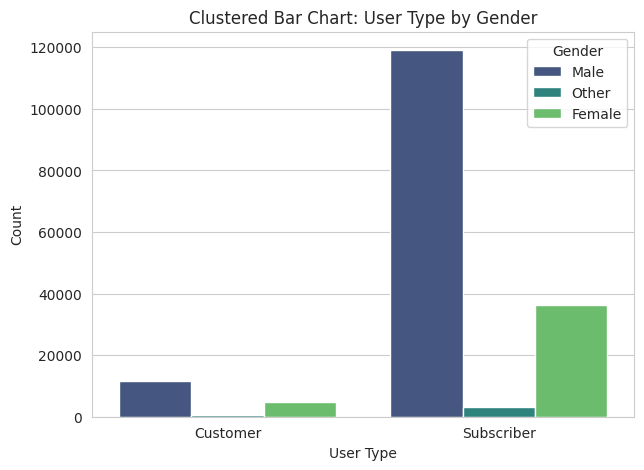

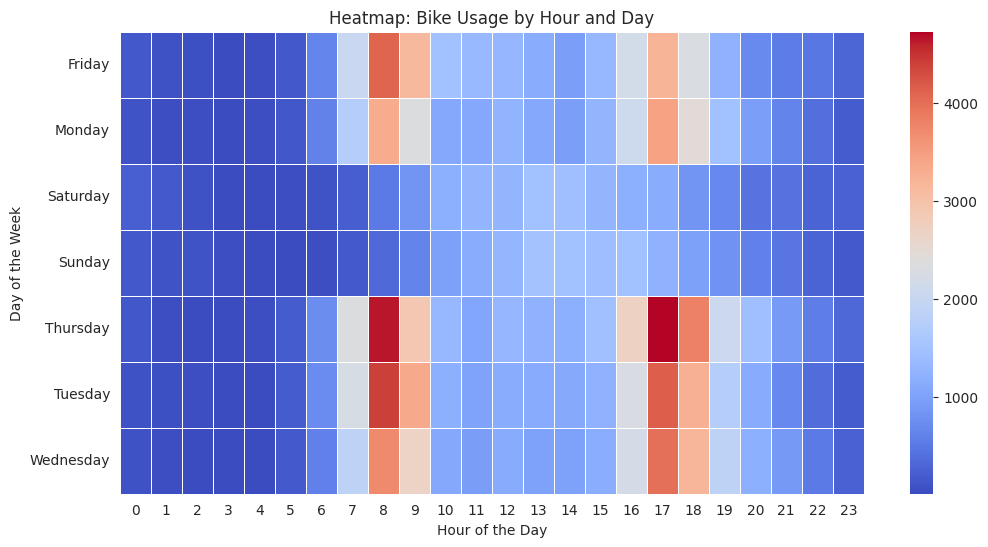

In [12]:
df["start_time"] = pd.to_datetime(df["start_time"])

# Calculate Age
df["age"] = 2019 - df["member_birth_year"]

# Scatter Plot: Trip Duration vs Age
plt.figure(figsize=(10, 5))
df_filtered = df[df["age"].notna()]
sns.scatterplot(x=df_filtered["age"], y=df_filtered["duration_sec"], alpha=0.3, color="blue")
plt.xlabel("Age")
plt.ylabel("Trip Duration (Seconds)")
plt.title("Scatter Plot: Trip Duration vs. Age")
plt.ylim(0, df_filtered["duration_sec"].quantile(0.95))
plt.show()

# Trip Duration by User Type
plt.figure(figsize=(7, 5))
sns.boxplot(x="user_type", y="duration_sec", data=df, hue="user_type", palette="coolwarm", legend=False)
plt.ylim(0, df["duration_sec"].quantile(0.95))
plt.xlabel("User Type")
plt.ylabel("Trip Duration (Seconds)")
plt.title("Box Plot: Trip Duration by User Type")
plt.show()

# Clustered Bar Chart: User Type vs Gender
plt.figure(figsize=(7, 5))
sns.countplot(x="user_type", hue="member_gender", data=df, palette="viridis")
plt.xlabel("User Type")
plt.ylabel("Count")
plt.title("Clustered Bar Chart: User Type by Gender")
plt.legend(title="Gender")
plt.show()

# Heatmap: Bike Usage by Hour and Day
df["hour"] = df["start_time"].dt.hour
df["weekday"] = df["start_time"].dt.day_name()

heatmap_data = df.groupby(["weekday", "hour"]).size().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", linewidths=0.5)
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.title("Heatmap: Bike Usage by Hour and Day")
plt.show()


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Trip Duration vs. Age (Scatter Plot)

- Younger riders (20–40 years old) generally had shorter trip durations, while older riders (50+ years old) had more variation in trip length.
- A few extreme outliers suggest some riders might have taken excessively long trips, potentially due to bike misuse or recording errors.
<br>
Trip Duration by User Type (Box Plot)
<br>
- Customers (casual riders) had a higher median trip duration than subscribers.
- Subscribers, who use the service regularly, tend to take shorter and more consistent trips, while casual users occasionally have very long trips.
- The outliers in the Customer group suggest that some casual riders use the bikes for extended periods.
<br>
User Type vs. Gender (Clustered Bar Chart)
<br>
- The majority of both Subscribers and Customers are male, but the male dominance is even more noticeable among Subscribers.
- Female riders make up a smaller proportion, and their presence is relatively balanced across both user types.
- The "Other" gender category has the smallest representation, making it harder to draw strong conclusions about its behavior.
- Peak Usage Times (Heatmap: Hour vs Day).

- Weekday mornings (7-9 AM) and evenings (4-7 PM) show peak usage, aligning with commuter patterns.
- Weekends have more even usage throughout the day, suggesting that people use bikes for leisure rather than commuting.
- The lowest bike usage is in the late-night hours (12AM - 5AM).

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- Subscribers follow a structured usage pattern (aligned with work commutes), while Customers take longer and more flexible trips.
- Older users exhibit greater variation in trip duration, potentially indicating different biking habits.
- Gender distribution remains skewed in all user types, suggesting a potential barrier for female ridership.

## Multivariate Exploration

- Facet Grid: Trip Duration by Age, Separated by User Type Helps understand if trip duration varies by age differently for Subscribers vs. Customers.

- Scatterplot with Multiple Encodings: Trip Duration vs. Start Hour
Encoded by Gender and User Type to see how trip length changes during the day.

- Plot Matrix: Pairwise Relationships Between Key Variables
An overview of trip duration, age, start time, and user type.

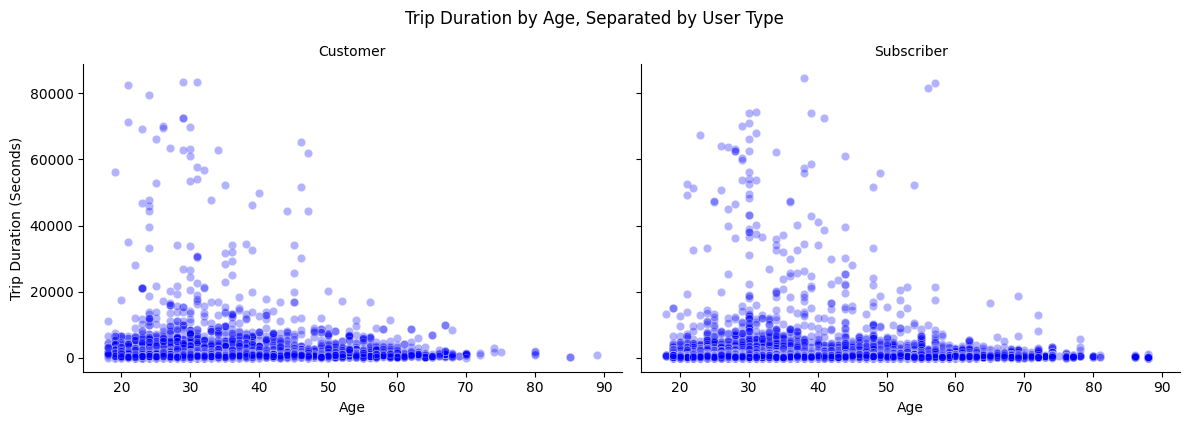

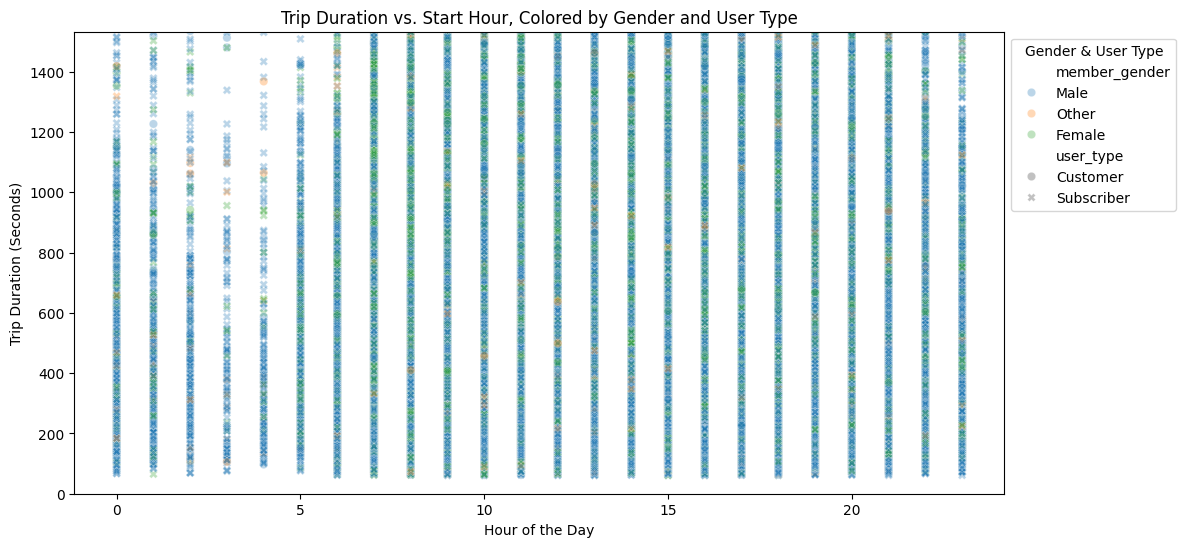

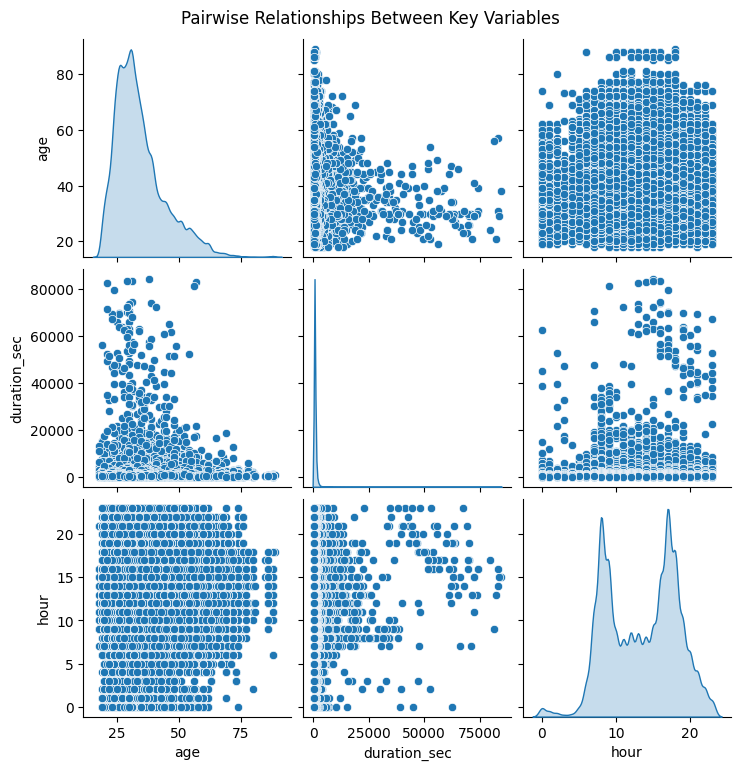

In [4]:
# Convert columns
df["start_time"] = pd.to_datetime(df["start_time"], errors='coerce')
df["hour"] = df["start_time"].dt.hour
df["age"] = 2019 - df["member_birth_year"]  # Convert birth year to age

# Filter out unreasonable ages
df = df[(df["age"] >= 10) & (df["age"] <= 90)]

# Facet Grid: Trip Duration by Age, Separated by User Type
g = sns.FacetGrid(df, col="user_type", height=4, aspect=1.5)
g.map_dataframe(sns.scatterplot, x="age", y="duration_sec", alpha=0.3, color="blue")
g.set_axis_labels("Age", "Trip Duration (Seconds)")
g.set_titles(col_template="{col_name}")
plt.suptitle("Trip Duration by Age, Separated by User Type", y=1.05)
plt.show()

# Scatterplot: Trip Duration vs. Start Hour, Encoded by Gender and User Type
plt.figure(figsize=(12, 6))
sns.scatterplot(x="hour", y="duration_sec", hue="member_gender", style="user_type", data=df, alpha=0.3)
plt.xlabel("Hour of the Day")
plt.ylabel("Trip Duration (Seconds)")
plt.title("Trip Duration vs. Start Hour, Colored by Gender and User Type")
plt.legend(title="Gender & User Type", bbox_to_anchor=(1, 1))
plt.ylim(0, df["duration_sec"].quantile(0.95))  # Remove extreme outliers
plt.show()

# Pairplot: Relationship Between Age, Trip Duration, and Hour
selected_vars = ["age", "duration_sec", "hour"]
df_cleaned = df[selected_vars].dropna()  # Drop NaNs before plotting

sns.pairplot(df_cleaned, diag_kind="kde", height=2.5)
plt.suptitle("Pairwise Relationships Between Key Variables", y=1.02)
plt.show()


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- There is a strong relationship between user type and trip duration. Subscribers generally have shorter and more consistent trip durations, while customers tend to have a wider range of trip lengths.
- Trip duration and time of day also show a clear pattern—most trips are shorter during peak commuting hours, suggesting that many users rely on the service for work commutes.
- Age and trip duration show a slight inverse relationship, where younger riders tend to have slightly longer trips compared to older riders.

### Were there any interesting or surprising interactions between features?

- Subscribers dominate weekday usage, especially during morning and evening rush hours, reinforcing that they use the service primarily for commuting.
- Customers take longer trips on average, especially during non-peak hours, which suggests they use the service for leisure rather than transportation.
- While gender differences were minimal, male riders appeared to have slightly longer trip durations than female riders.

## Conclusions
**Summary of Key Findings:**

- Subscribers vs. Customers: Subscribers dominate bike usage and take shorter, more consistent trips, primarily during weekday rush hours. Customers take longer trips, especially during non-peak hours, indicating leisure-based usage.

- Trip Duration Patterns: Most trips last under 16 minutes, with a few extreme outliers. Customers tend to have longer trips compared to subscribers.
- Age & Trip Duration: Younger riders (20-40 years old) have slightly longer trips, while older users (50+) show more variation in trip duration.
- Peak Usage Times: Peak bike usage occurs during weekday mornings (7-9 AM) and evenings (4-7 PM), aligning with commuter behavior. Weekend usage is more evenly distributed throughout the day.
- Gender Distribution: The dataset is skewed toward male riders, and their dominance is even more noticeable among subscribers.

**Reflections on the Data Exploration Process:**
- Data Cleaning & Wrangling: Addressed missing values, converted date-time features, and filtered extreme outliers to ensure accurate visualizations.
- Univariate Exploration: Provided insights into trip duration distribution, user type proportions, and gender distribution.
- Bivariate & Multivariate Analysis: Explored relationships between user type, trip duration, age, time of day, and gender, uncovering distinct behavioral patterns.
